In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import csv
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward, complete, average
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
mall = pd.read_csv('D:\Mall_Customers.csv')
mall.sample()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
129,130,Male,38,71,75


In [3]:
mall.rename(columns = {'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace = True)

In [4]:
mall.sample()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
175,176,Female,30,88,86


In [5]:
mall_clust = mall[['Annual_Income', 'Spending_Score']]

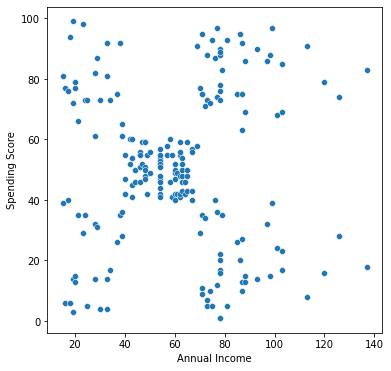

In [6]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', data = mall_clust)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show() 

In [7]:
scaler = StandardScaler()
mall_clust_scaled = scaler.fit_transform(mall_clust)
dbscan = DBSCAN(eps = 0.2, min_samples = 10)
cluster = dbscan.fit_predict(mall_clust_scaled)

silhouette_score(mall_clust_scaled, cluster)

0.0965528913348881

In [8]:
for eps in [i/10 for i in range(2,6)]:
    for min_samples in range (6,10):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(mall_clust_scaled)
        score = silhouette_score(mall_clust_scaled, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


eps 0.2
\min samples 6
clusters present: [-1  0  1  2  3]
clusters sizes: [95 78 10  9  8]
Silhouette Score: 0.09644483815713828

eps 0.2
\min samples 7
clusters present: [-1  0  1  2  3]
clusters sizes: [100  78   8   7   7]
Silhouette Score: 0.05559332249286136

eps 0.2
\min samples 8
clusters present: [-1  0  1]
clusters sizes: [116  76   8]
Silhouette Score: 0.04120506369450063

eps 0.2
\min samples 9
clusters present: [-1  0]
clusters sizes: [128  72]
Silhouette Score: 0.10238770147236753

eps 0.3
\min samples 6
clusters present: [-1  0  1  2  3  4  5]
clusters sizes: [48 10  6 87 26 14  9]
Silhouette Score: 0.2498353162292518

eps 0.3
\min samples 7
clusters present: [-1  0  1  2  3]
clusters sizes: [72 10 82 24 12]
Silhouette Score: 0.23146493255355374

eps 0.3
\min samples 8
clusters present: [-1  0  1  2  3  4]
clusters sizes: [72 10 82 12 12 12]
Silhouette Score: 0.19432071085905328

eps 0.3
\min samples 9
clusters present: [-1  0  1  2  3]
clusters sizes: [86 82 12 10 10]
S

In [9]:
dbscan = DBSCAN(eps = 0.4, min_samples = 8)
labels = dbscan.fit_predict(mall_clust_scaled)
mall_clust['cluster'] = labels

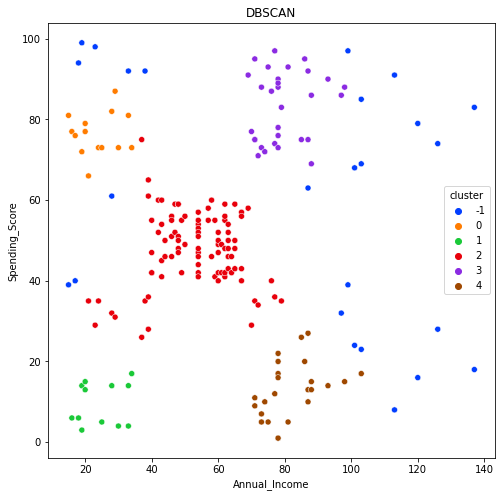

In [10]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', data = mall_clust, hue = 'cluster', palette = 'bright')
plt.title('DBSCAN')
plt.show()

In [11]:
cluster_name = ['Cluster -1', 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
color = ['Blue', 'Orange', 'Green', 'Red', 'Purple', 'Brown']
vs_list = ['Noise', 'Low Income VS High Spending', 'Lowest Income  VS Lowest Spending',
           'Medium Income VS Medium Spending', 'High Income VS Highest Spending',
           'High Income VS Low Spending']
dbscan_summary = pd.DataFrame({
    'Color': color,
    'Cluster DBSCAN': cluster_name,
    'Annual Income VS Spending Score': vs_list
})
dbscan_summary

,Color,Cluster DBSCAN,Annual Income VS Spending Score
0,Blue,Cluster -1,Noise
1,Orange,Cluster 0,Low Income VS High Spending
2,Green,Cluster 1,Lowest Income VS Lowest Spending
3,Red,Cluster 2,Medium Income VS Medium Spending
4,Purple,Cluster 3,High Income VS Highest Spending
5,Brown,Cluster 4,High Income VS Low Spending
